In [1]:
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

os.chdir(os.path.dirname(os.path.abspath('__file__')))

In [2]:
# cargar los datos de la db
conn = sqlite3.connect('DB/daily_visits.db')
df = pd.read_sql("SELECT * FROM visit_quant", conn, parse_dates='Date', index_col='Date')
conn.close()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851 entries, 2020-01-01 to 2022-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Users   851 non-null    int64
dtypes: int64(1)
memory usage: 13.3 KB


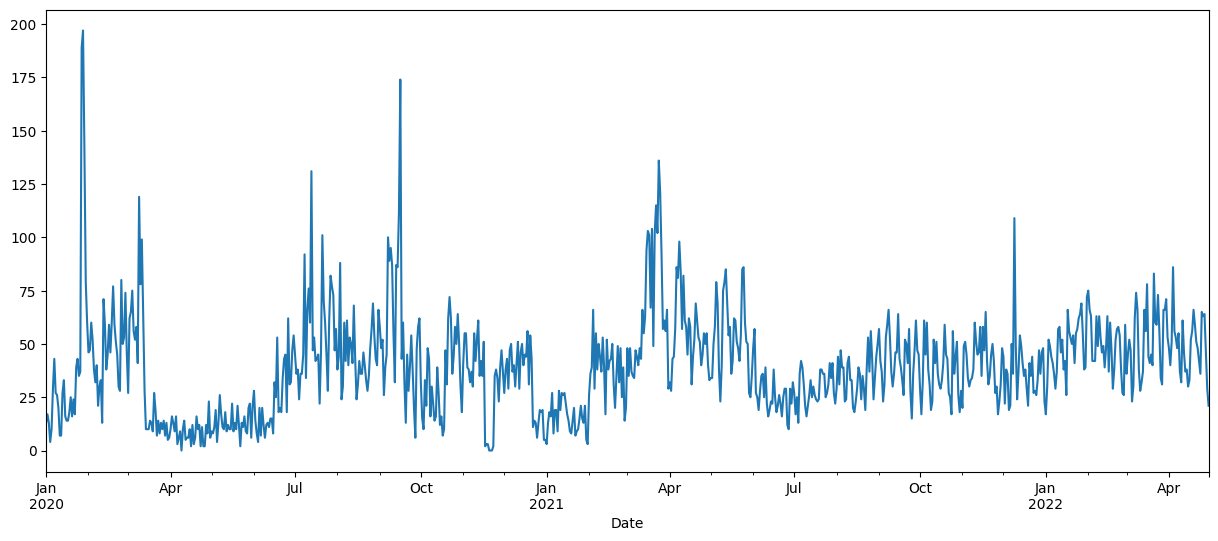

In [3]:
df['Users'].plot(figsize=(15,6));

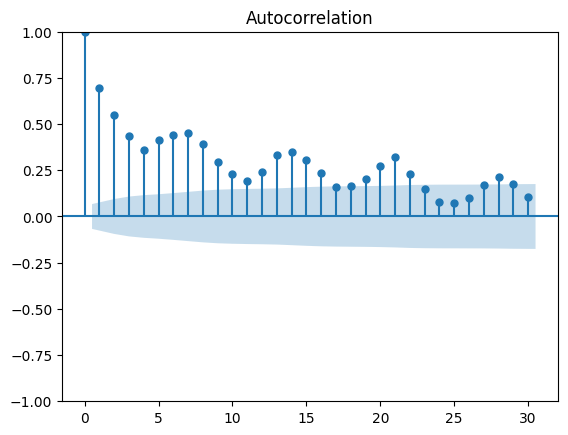

In [4]:
plot_acf(df['Users']);

In [5]:
X = df['Users'].values
train = X[:int(len(X)*0.85)]
test = X[int(len(X)*0.85):]
print(len(X), len(train) + len(test))

851 851


In [6]:
model_ar = ARIMA(order=(1,0,0))
model_ar.fit(train)

ARIMA(order=(1, 0, 0))

In [7]:
predictions = model_ar.predict(128)
print("MAE:", mean_absolute_error(test, predictions))
print("MAPE:", mean_absolute_percentage_error(test, predictions))

MAE: 14.207949691824432
MAPE: 0.2738329129813822


In [14]:
model = auto_arima(train,
                   start_p = 5,
                   start_q = 5,
                   max_p = 15,
                   max_q = 15,
                   max_d = 10,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=6084.782, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6675.643, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6178.883, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6369.039, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7552.643, Time=0.00 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=6089.466, Time=0.58 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=6088.228, Time=0.64 sec
 ARIMA(6,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(5,0,6)(0,0,0)[0] intercept   : AIC=6086.009, Time=0.74 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=6087.789, Time=0.60 sec
 ARIMA(4,0,6)(0,0,0)[0] intercept   : AIC=6089.776, Time=0.70 sec
 ARIMA(6,0,4)(0,0,0)[0] intercept   : AIC=6090.745, Time=0.66 sec
 ARIMA(6,0,6)(0,0,0)[0] intercept   : AIC=6086.570, Time=0.77 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=0.60 sec

Best model:  ARIMA(5,0,5)(0,0,0)[0] interc

In [16]:
model = ARIMA(order=(5, 0, 5))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  723
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -3030.391
Date:                Mon, 28 Aug 2023   AIC                           6084.782
Time:                        23:07:25   BIC                           6139.783
Sample:                             0   HQIC                          6106.011
                                - 723                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.9634      2.537      2.745      0.006       1.991      11.935
ar.L1          0.6741      0.044     15.264      0.000       0.588       0.761
ar.L2          0.1427      0.061      2.344      0.0

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
predictions = model.predict(128)
print("MAE:", mean_absolute_error(test, predictions))
print("MAPE:", mean_absolute_percentage_error(test, predictions))

MAE: 15.152519485736153
MAPE: 0.2828468038765535


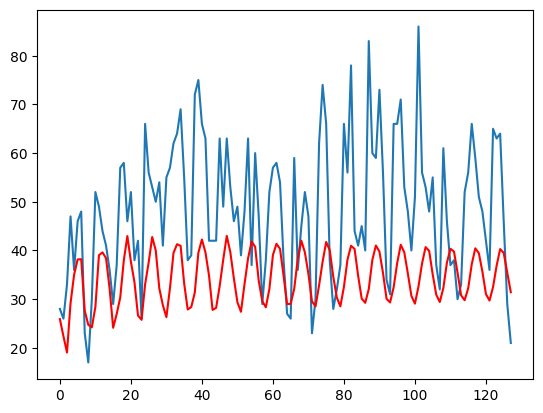

In [18]:
plt.plot(test)
plt.plot(predictions,color='red');